# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털 https://kosis.kr/index/index.do
- 온라인 쇼핑몰 판매매체별 / 상품군별거래액
- 합계 등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어 미리 합침)
- 행렬을 전환
<div style="display:flex">
    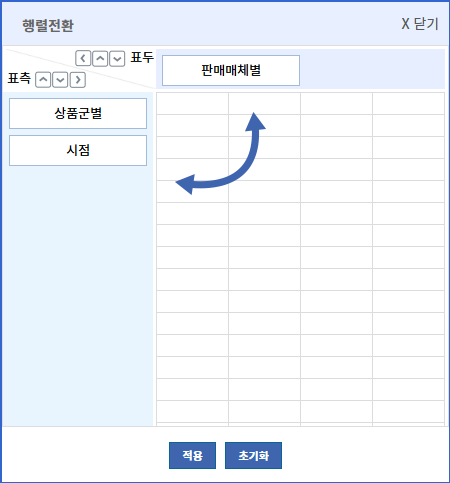
    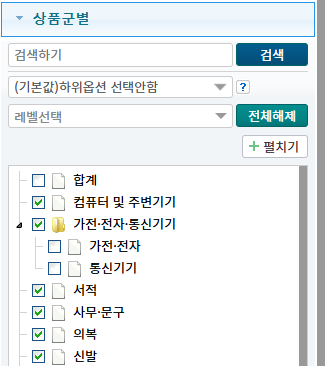
</div>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
#font 설정 D2coding
d2_path ="./data ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [3]:
file_path = "./data ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")  # 인코딩 오류날까봐 미리 적어둠 ~

ori.columns = ["category","date","internet", "mobile"]
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [4]:
print("수정 전")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))
print("수정 후")
print(ori['date'].tail())

수정 전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정 후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [5]:
ori['date']= pd.to_datetime(ori["date"],format='%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [38]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category'] == '여행 및 교통서비스']#'의복']#'음식서비스']#'애완용품']#'음·식료품'] #'의복']#'컴퓨터 및 주변기기']
obj = ['컴퓨터 및 주변기기','농축수산물','여행 및 교통서비스','음식서비스','애완용품','음·식료품','의복','신발','가방']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1073,음·식료품,2018-06-01,277793,533452
1578,애완용품,2020-07-01,31989,106231
611,가방,2019-12-01,57540,187674
52,컴퓨터 및 주변기기,2021-05-01,358402,370299
660,가방,2024-01-01,64242,161386


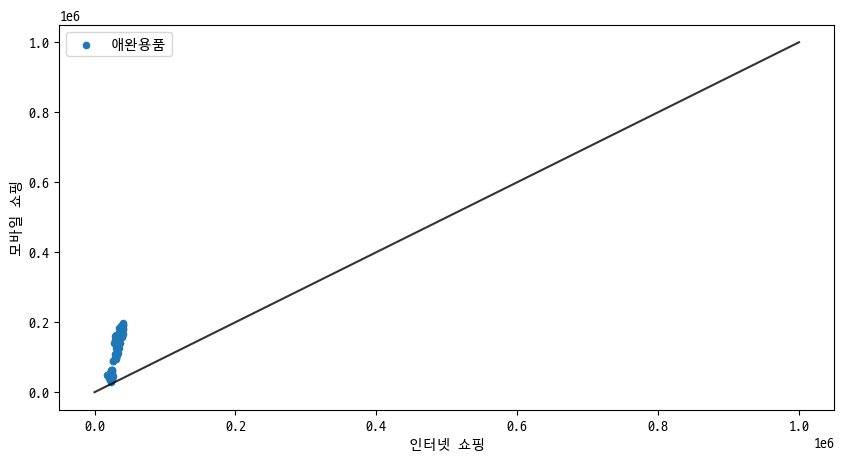

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

category_data = ex1_data[ex1_data['category']==obj[4]]
x_data = category_data['internet']
y_data = category_data['mobile']

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")

ax.scatter(x_data, y_data, s=20, label = obj[4])
ax.legend(loc="best")   # l e g e n d n e v e r d i e
ax.plot([0,1000000],[0,1000000], 'k-', alpha=0.8)  # 선 길이가 1,000,000임~
# 선을 기준으로 위는 모바일 쇼핑, 아래는 인터넷 쇼핑~~
plt.show()
# print(category_data, x_data, y_data)

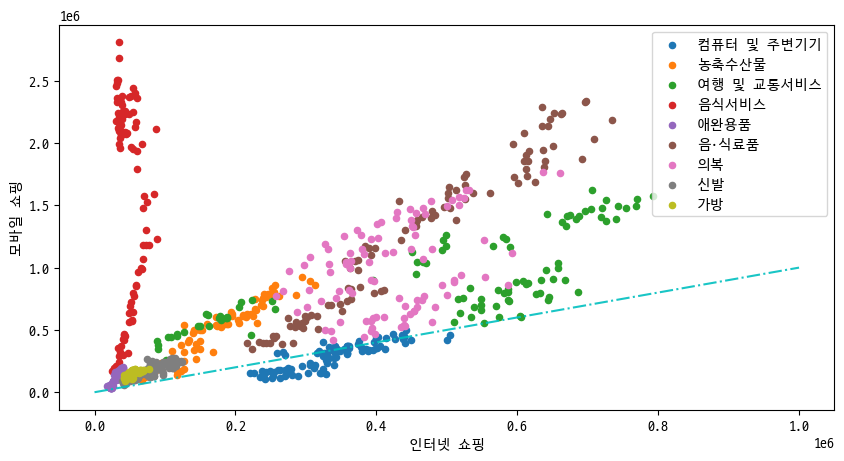

In [46]:
fig, ax = plt.subplots(figsize=(10,5))

category = obj # ['컴퓨터 및 주변기기','농축수산물','여행 및 교통서비스','의복','음식서비스','애완용품','음·식료품','의복','신발','가방']


for cate in obj:
    category_data = ex1_data[ex1_data['category']==cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s=20, label = cate)

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")


ax.legend(loc="best")   # l e g e n d n e v e r d i e
ax.plot([0,1000000],[0,1000000], 'c-.', alpha=0.9)  # 선 길이가 1,000,000임~
# 선을 기준으로 위는 모바일 쇼핑, 아래는 인터넷 쇼핑~~
plt.show()
# print(category_data, x_data, y_data)